In [96]:
import xarray as xr

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from bs_fdbck.constants import path_extract_latlon_outdata
from dask.diagnostics import ProgressBar
import seaborn as sns
import numpy as np

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:209: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if station is 'ATTO':


In [97]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
from bs_fdbck.util.BSOA_datamanip import compute_total_tau, broadcase_station_data, change_units_and_compute_vars, \
    get_dic_df_mod

In [99]:
def make_fn(case, v_x, v_y, comment='', relplot = False, distplot=False):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'cloud_props_long_sum_{comment}_{case}_{_x}_{_y}.png'
    if relplot:
        return plot_path_relplot/f
    if distplot:
        return plot_path_distplot/f

    return plot_path /f




In [100]:
plot_path = Path('Plots')
plot_path.mkdir(parents=True, exist_ok=True) 

plot_path_distplot = plot_path/'dist_plot'
plot_path_distplot.mkdir(parents=True, exist_ok=True) 

plot_path_relplot = plot_path/'rel_plot'
plot_path_relplot.mkdir(parents=True, exist_ok=True) 

In [101]:
xr.set_options(keep_attrs=True) 

## Get observational data

In [102]:
import pandas as pd

In [103]:
high_low_vars = ['N50','N100','N150','N200','N100 (cm^-3)']

In [104]:
from bs_fdbck.constants import path_measurement_data

In [105]:
fn = path_measurement_data / 'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=4, header=1,)# usecols=range(7,12),nrows=7)

df_hyy_1.head()
#df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
#                            'T (degree C).1':'T (degree C)',
#                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
#                             'N100 (cm^-3).1':'N100 (cm^-3)'
#                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1

,year,month,day,LAT,LON,OA (microgram m^-3),CWP (g m^-2),CER (micrometer),COT
0,2012,7,5,60.5,22.5,3.218589,191,12.940000,26.219999
1,2012,7,10,60.5,22.5,4.714353,172,10.950000,24.430000
2,2012,7,14,60.5,22.5,1.451827,106,15.790000,12.030000
3,2012,7,19,60.5,22.5,3.101941,262,16.039999,28.650000
4,2012,7,22,60.5,22.5,0.875789,92,10.630000,14.820000
...,...,...,...,...,...,...,...,...,...
3668,2018,8,13,65.5,29.5,0.674785,191,15.200000,18.969999
3669,2018,8,14,65.5,29.5,1.356364,291,15.200000,31.449999
3670,2018,8,19,65.5,29.5,0.916047,139,18.230000,11.960000
3671,2018,8,20,65.5,29.5,1.325436,177,14.049999,19.869999


In [106]:
import pandas as pd

In [107]:
df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )

In [108]:
df_hyy_1 = df_hyy_1.set_index(['date','LAT','LON'])

In [109]:
df_hyy_1

,,,year,month,day,OA (microgram m^-3),CWP (g m^-2),CER (micrometer),COT
date,LAT,LON,,,,,,,
2012-07-05,60.5,22.5,2012,7,5,3.218589,191,12.940000,26.219999
2012-07-10,60.5,22.5,2012,7,10,4.714353,172,10.950000,24.430000
2012-07-14,60.5,22.5,2012,7,14,1.451827,106,15.790000,12.030000
2012-07-19,60.5,22.5,2012,7,19,3.101941,262,16.039999,28.650000
2012-07-22,60.5,22.5,2012,7,22,0.875789,92,10.630000,14.820000
...,...,...,...,...,...,...,...,...,...
2018-08-13,65.5,29.5,2018,8,13,0.674785,191,15.200000,18.969999
2018-08-14,65.5,29.5,2018,8,14,1.356364,291,15.200000,31.449999
2018-08-19,65.5,29.5,2018,8,19,0.916047,139,18.230000,11.960000


## Pick up sizedist info as well

In [110]:
df_hyy_2 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))
df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )



In [111]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_Nx_daily_JA_median_df



df_ebas_Nx, ds_ebas_Nx = get_ebas_dataset_Nx_daily_JA_median_df()#x_list = [90,100,110,120])

Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:242: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_JA.mean()
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:245: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_JA.median())


In [112]:

df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )


df_hyy_2 = df_hyy_2.set_index('date')

In [113]:
df_hyy_2.index = df_hyy_2.index.rename('time') 

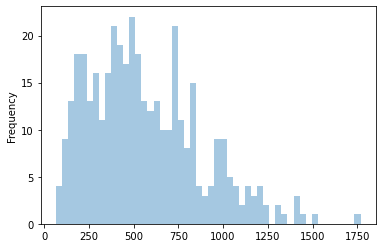

In [114]:
df_hyy_2['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')

plt.show()



## Why is my method 20% off their method? Is it integration?

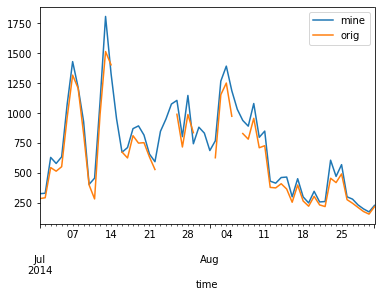

1.13207410632531


In [115]:

df_joint_hyy = pd.merge(df_ebas_Nx, df_hyy_2, left_index=True, right_index=True)
(df_joint_hyy['N100']).loc['2014-07':'2014-09'].plot(label='mine')
(df_joint_hyy['N100 (cm^-3)']).loc['2014-07':'2014-09'].plot(label='orig')
plt.legend()
plt.show()



print(df_joint_hyy['N100'][df_joint_hyy['N100 (cm^-3)'].notnull()].mean()/df_joint_hyy['N100 (cm^-3)'].mean())

In [116]:
df_hyy_1

,,,year,month,day,OA (microgram m^-3),CWP (g m^-2),CER (micrometer),COT
date,LAT,LON,,,,,,,
2012-07-05,60.5,22.5,2012,7,5,3.218589,191,12.940000,26.219999
2012-07-10,60.5,22.5,2012,7,10,4.714353,172,10.950000,24.430000
2012-07-14,60.5,22.5,2012,7,14,1.451827,106,15.790000,12.030000
2012-07-19,60.5,22.5,2012,7,19,3.101941,262,16.039999,28.650000
2012-07-22,60.5,22.5,2012,7,22,0.875789,92,10.630000,14.820000
...,...,...,...,...,...,...,...,...,...
2018-08-13,65.5,29.5,2018,8,13,0.674785,191,15.200000,18.969999
2018-08-14,65.5,29.5,2018,8,14,1.356364,291,15.200000,31.449999
2018-08-19,65.5,29.5,2018,8,19,0.916047,139,18.230000,11.960000


In [117]:
take_vars = ['N50','N100','N150','N200','N100 (cm^-3)']

In [118]:
import numpy as np

In [119]:
for v in high_low_vars:
    df_hyy_1[v] = np.nan

for d in df_hyy_1.index.get_level_values(0).unique():
    #print(d)
    for v in take_vars:
        df_hyy_1.loc[d,v] = df_joint_hyy.loc[d,v]

/tmp/ipykernel_80998/3996915807.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_hyy_1.loc[d,v] = df_joint_hyy.loc[d,v]


In [120]:
for v in take_vars:
    df_hyy_1[f'{v}_low'] = df_hyy_1[v]<df_hyy_1[v].quantile(.34)
    df_hyy_1[f'{v}_high']= df_hyy_1[v]>df_hyy_1[v].quantile(.66)
    df_hyy_1[f'{v}_category'] = pd.NA#df_hyy_1.assign(OA_category= pd.NA)
    
    df_hyy_1.loc[df_hyy_1[f'{v}_high'], f'{v}_category'] = f'{v} high'
    df_hyy_1.loc[df_hyy_1[f'{v}_low'], f'{v}_category'] = f'{v} low'

In [121]:
high_low_vars

['N50', 'N100', 'N150', 'N200', 'N100 (cm^-3)']

In [122]:
#df_hyy_1['OA_category']

df_hyy_1['OA_low']= df_hyy_1['OA (microgram m^-3)']<2
df_hyy_1['OA_high']= df_hyy_1['OA (microgram m^-3)']>2
ddf_hyy_1=df_hyy_1.assign(OA_category= pd.NA)
df_hyy_1.loc[df_hyy_1['OA_high'], 'OA_category'] = 'OA high'
df_hyy_1.loc[df_hyy_1['OA_low'], 'OA_category'] = 'OA low'



In [123]:
bins = pd.IntervalIndex.from_tuples([(60, 100), (100, 140), (140, 180), (180, 220), (220, 260), (260, 300), (300, 340)])

In [124]:
labels=[ 80, 120, 160, 200, 240, 280, 320]

In [125]:
df_hyy_1['CWP_cut']=pd.cut(df_hyy_1['CWP (g m^-2)'], bins=bins, labels=labels)
df_hyy_1['CWP_qcut']=pd.qcut(df_hyy_1['CWP (g m^-2)'], 6)#bins=bins, labels=labels)

In [126]:
df_hyy_1['CWP_qcutl'] = df_hyy_1['CWP_qcut'].apply(lambda x:x.mid)

df_hyy_1['CWP_cutl'] = df_hyy_1['CWP_cut'].apply(lambda x:x.mid)
di = dict(df_hyy_1.groupby('CWP_cut').median()['CWP (g m^-2)'])
for k in di.keys():
    di[k] = int(np.round(di[k]))
df_hyy_1['CWP_cutlm'] = df_hyy_1['CWP_cut'].apply(lambda x:di[x])

In [127]:
n_bins = 7
labels = np.arange(n_bins)

qants = df_hyy_1['CWP (g m^-2)'].quantile([.05,.95])

bins2 = pd.interval_range(qants.iloc[0], qants.iloc[1], periods=n_bins)
df_hyy_1['CWP_cut2']=pd.cut(df_hyy_1['CWP (g m^-2)'], bins=bins2, labels=labels)


di_per_lab = {bins2[i]:labels[i] for i in range(len(labels))}

df_hyy_1['CWP_cut2l'] = df_hyy_1['CWP_cut2'].apply(lambda x:di_per_lab[x])


di = dict(df_hyy_1.groupby('CWP_cut2').median()['CWP (g m^-2)'])
for k in di.keys():
    di[k] = int(np.round(di[k]))
df_hyy_1['CWP_cut2lm'] = df_hyy_1['CWP_cut2'].apply(lambda x:di[x])

In [128]:
bins2

IntervalIndex([(70.0, 108.85714285714286], (108.85714285714286, 147.71428571428572], (147.71428571428572, 186.57142857142856], (186.57142857142856, 225.42857142857142], (225.42857142857142, 264.2857142857143], (264.2857142857143, 303.1428571428571], (303.1428571428571, 342.0]], dtype='interval[float64, right]')

<AxesSubplot:ylabel='Frequency'>

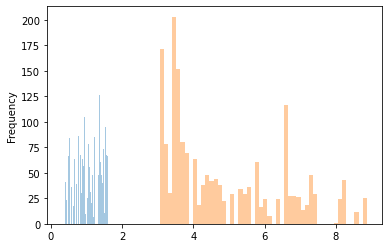

In [129]:
df_hyy_1['OA (microgram m^-3)'][df_hyy_1['OA_low']].plot.hist(bins=50, alpha=0.4, label='obs')
df_hyy_1['OA (microgram m^-3)'][df_hyy_1['OA_high']].plot.hist(bins=50, alpha=0.4, label='obs')



## Get model data:

In [130]:
model_name_noresm = 'NorESM'
model_name_echam  = 'ECHAM-SALSA' 

In [131]:
models =[model_name_noresm, model_name_echam]

### Settings

In [132]:
lon_lims = [22., 30.]
lat_lims = [60., 66.]

lat_smr = 61.85
lon_smr = 24.28
model_lev_i=-1

In [133]:
temperature = 273.15  # K

from_time1 = '2012-01-01'
to_time1 = '2015-01-01'
from_time2 ='2015-01-01'
to_time2 ='2019-01-01'

### NorEMS

In [134]:
case_name_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp245'

#### Input files

In [135]:
fn_noresm = path_extract_latlon_outdata/ case_name_noresm/f'{case_name_noresm}.h1._{from_time1}-{to_time2}_concat_subs_22.0-30.0_60.0-66.0_lev1_final.nc'
fn_noresm_csv = path_extract_latlon_outdata/ case_name_noresm/f'{case_name_noresm}.h1._{from_time1}-{to_time2}_concat_subs_22.0-30.0_60.0-66.0_lev1_final_long_summer.csv'

In [136]:

cases_noresm = [case_name_noresm]

#### Station variables

In [137]:
varl_st_noresm = [      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3',
                 ]


varl_cl_noresm = ['TOT_CLD_VISTAU','TOT_ICLD_VISTAU','TGCLDCWP','TGCLDLWP','TGCLDIWP',
           'TOT_CLD_VISTAU_s','TOT_ICLD_VISTAU_s','optical_depth',
           'CLDFREE',
           'FCTL',
           'ACTREL','ACTNL','TGCLDLWP',
           'FSDSC','FSDSCDRF',
           'FCTI',
           'FCTL',
           'FLNS',
           'FLNSC',
           'FLNT',
           'FLNTCDRF',
           'FLNT_DRF',
           'FLUS',
           'FLUTC','FORMRATE',
           'FREQI',
           'FREQL',
           'FSDSCDRF',
           'FSDS_DRF',
           'FSNS',
           'FSNSC',
           'FSNT',
           'FSNTCDRF',
           'FSNT_DRF',
           'FSUS_DRF',
           'FSUTADRF',
           ]

### ECHAM-SALSA

In [138]:

case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'

#### Define some strings for files

In [139]:

str_from_t = pd.to_datetime(from_time1).strftime('%Y%m')
str_to = pd.to_datetime(to_time2).strftime('%Y%m')
str_lonlim = '%.1f-%.1f'%(*lon_lims,)
str_latlim = '%.1f-%.1f'%(*lat_lims,)
str_coordlims = f'{str_lonlim}_{str_latlim}'
str_coordlims

'22.0-30.0_60.0-66.0'

#### Input files:

In [140]:
input_path_echam = path_extract_latlon_outdata / model_name_echam / case_name_echam 

In [141]:
fn_final_echam = input_path_echam / f'{case_name}_{from_time1}-{to_time2}_ALL-VARS_concat_subs_{str_coordlims}.nc'
fn_final_echam_csv = input_path_echam / f'{case_name}_{from_time1}-{to_time2}_ALL-VARS_concat_subs_{str_coordlims}_long_summer.csv'

In [142]:

cases_echam = [case_name_echam]

#### Station variables

In [143]:
varl_st_echam = ['mmrtrN500',
                 'mmrtrN250',
                 'mmrtrN200',
                 'mmrtrN100',
                 'mmrtrN50',
                 'mmrtrN3',
                 'SO2_gas',
                 'APIN_gas',
                 'TBETAOCI_gas',
                 'BPIN_gas',
                 'LIMON_gas',
                 'SABIN_gas',
                 'MYRC_gas',
                 'CARENE3_gas',
                 'ISOP_gas',
                 'VBS0_gas',
                 'V*BS1_gas',
                 'VBS10_gas',
                 'ORG_mass',
                 'oh_con',
                 'tempair',
                 'ccn02',
                 'ccn10',

          ]


varl_cl_echam = [
    'airdens',
    'uw',
    'vw',
    'cod',
    'cwp',
    'ceff',
    'ceff_ct',
    'lcdnc',
    'lcdnc_ct',
    'clfr',
    'cl_time',
    'aot550nm',
    'up_sw',
    'up_sw_cs',
    'up_sw_noa',
    'up_sw_cs_noa',
    'up_lw',
    'up_lw_cs',
    'up_lw_noa',
    'up_lw_cs_noa',
    'emi_monot_bio',
    'emi_isop_bio',
           ]

### READ CVS

In [144]:
df_mod_noresm = pd.read_csv(fn_noresm_csv, index_col=[0,1,2] )

<AxesSubplot:ylabel='Frequency'>

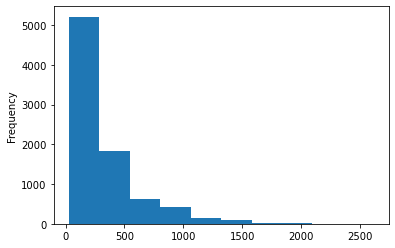

In [145]:
df_mod_noresm['N100'].plot.hist()

In [146]:
df_mod_echam = pd.read_csv(fn_final_echam_csv, index_col=[0,1,2] )

<AxesSubplot:ylabel='Frequency'>

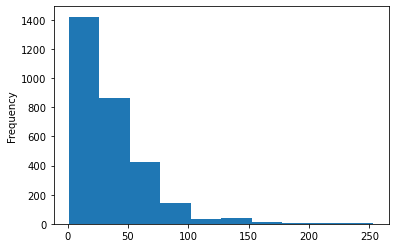

In [147]:
df_mod_echam['N200'].plot.hist()

In [148]:
df_hyy_1.index = df_hyy_1.index.rename({'LAT':'lat', 'LON':'lon','date':'time'})

In [149]:
dic_df=dict()
dic_df[model_name_echam] = df_mod_echam
dic_df[model_name_noresm] = df_mod_noresm
dic_df['Observations'] = df_hyy_1

In [150]:
df_mod_noresm[df_mod_noresm['isSummer'].notnull()]

NMR13  nscur  hybm   T  EC550AER  FLNS  FSNS  DER  \
time       lat       lon                                                        
2012-06-01 60.785340 22.50    NaN    NaN   NaN NaN       NaN   NaN   NaN  NaN   
                     23.75    NaN    NaN   NaN NaN       NaN   NaN   NaN  NaN   
                     25.00    NaN    NaN   NaN NaN       NaN   NaN   NaN  NaN   
                     26.25    NaN    NaN   NaN NaN       NaN   NaN   NaN  NaN   
                     27.50    NaN    NaN   NaN NaN       NaN   NaN   NaN  NaN   
...                           ...    ...   ...  ..       ...   ...   ...  ...   
2018-09-30 65.497382 25.00    NaN    NaN   NaN NaN       NaN   NaN   NaN  NaN   
                     26.25    NaN    NaN   NaN NaN       NaN   NaN   NaN  NaN   
                     27.50    NaN    NaN   NaN NaN       NaN   NaN   NaN  NaN   
                     28.75    NaN    NaN   NaN NaN       NaN   NaN   NaN  NaN   
                     30.00    NaN    NaN   NaN NaN       NaN   NaN   NaN  NaN   

                            CCN3  SFisoprene  ...  ismonth8  ismonth9  isJuly  \
time       lat       lon                      ...                               
2012-06-01 60.785340 22.50   NaN         NaN  ...       0.0       0.0     0.0   
                     23.75   NaN         NaN  ...       0.0       0.0     0.0   
                     25.00   NaN         NaN  ...       0.0       0.0     0.0   
                     26.25   NaN         NaN  ...       0.0       0.0     0.0   
                     27.50   NaN         NaN  ...       0.0       0.0     0.0   
...                          ...         ...  ...       ...       ...     ...   
2018-09-30 65.497382 25.00   NaN         NaN  ...       0.0       1.0     0.0   
                     26.25   NaN         NaN  ...       0.0       1.0     0.0   
                     27.50   NaN         NaN  ...       0.0       1.0     0.0   
                     28.75   NaN         NaN  ...       0.0       1.0     0.0   
                     30.00   NaN         NaN  ...       0.0       1.0     0.0   

                            isAug  isJA  isSummer    ilev         lev  \
time       lat       lon                                                
2012-06-01 60.785340 22.50    0.0   0.0       1.0  1000.0  992.556095   
                     23.75    0.0   0.0       1.0  1000.0  992.556095   
                     25.00    0.0   0.0       1.0  1000.0  992.556095   
                     26.25    0.0   0.0       1.0  1000.0  992.556095   
                     27.50    0.0   0.0       1.0  1000.0  992.556095   
...                           ...   ...       ...     ...         ...   
2018-09-30 65.497382 25.00    0.0   0.0       1.0  1000.0  992.556095   
                     26.25    0.0   0.0       1.0  1000.0  992.556095   
                     27.50    0.0   0.0       1.0  1000.0  992.556095   
                     28.75    0.0   0.0       1.0  1000.0  992.556095   
                     30.00    0.0   0.0       1.0  1000.0  992.556095   

                            station  year  
time       lat       lon                   
2012-06-01 60.785340 22.50      SMR  2012  
                     23.75      SMR  2012  
                     25.00      SMR  2012  
                     26.25      SMR  2012  
                     27.50      SMR  2012  
...                             ...   ...  
2018-09-30 65.497382 25.00      SMR  2018  
                     26.25      SMR  2018  
                     27.50      SMR  2018  
                     28.75      SMR  2018  
                     30.00      SMR  2018  

[35868 rows x 208 columns]

In [151]:
df_mod_echam[df_mod_echam['isSummer'].notnull()]

ORG_mass  airdens  aot550nm  ccn02  ccn10  ceff  \
time       lat       lon                                                       
2012-06-01 64.350730 22.500       NaN      NaN       NaN    NaN    NaN   NaN   
                     24.375       NaN      NaN       NaN    NaN    NaN   NaN   
                     26.250       NaN      NaN       NaN    NaN    NaN   NaN   
                     28.125       NaN      NaN       NaN    NaN    NaN   NaN   
                     30.000       NaN      NaN       NaN    NaN    NaN   NaN   
...                               ...      ...       ...    ...    ...   ...   
2018-09-30 60.620396 22.500       NaN      NaN       NaN    NaN    NaN   NaN   
                     24.375       NaN      NaN       NaN    NaN    NaN   NaN   
                     26.250       NaN      NaN       NaN    NaN    NaN   NaN   
                     28.125       NaN      NaN       NaN    NaN    NaN   NaN   
                     30.000       NaN      NaN       NaN    NaN    NaN   NaN   

                             ceff_ct  cl_time  clfr  cod  ...  ismonth6  \
time       lat       lon                                  ...             
2012-06-01 64.350730 22.500      NaN      NaN   NaN  NaN  ...       1.0   
                     24.375      NaN      NaN   NaN  NaN  ...       1.0   
                     26.250      NaN      NaN   NaN  NaN  ...       1.0   
                     28.125      NaN      NaN   NaN  NaN  ...       1.0   
                     30.000      NaN      NaN   NaN  NaN  ...       1.0   
...                              ...      ...   ...  ...  ...       ...   
2018-09-30 60.620396 22.500      NaN      NaN   NaN  NaN  ...       0.0   
                     24.375      NaN      NaN   NaN  NaN  ...       0.0   
                     26.250      NaN      NaN   NaN  NaN  ...       0.0   
                     28.125      NaN      NaN   NaN  NaN  ...       0.0   
                     30.000      NaN      NaN   NaN  NaN  ...       0.0   

                             ismonth7  ismonth8  ismonth9  isJuly  isAug  \
time       lat       lon                                                   
2012-06-01 64.350730 22.500       0.0       0.0       0.0     0.0    0.0   
                     24.375       0.0       0.0       0.0     0.0    0.0   
                     26.250       0.0       0.0       0.0     0.0    0.0   
                     28.125       0.0       0.0       0.0     0.0    0.0   
                     30.000       0.0       0.0       0.0     0.0    0.0   
...                               ...       ...       ...     ...    ...   
2018-09-30 60.620396 22.500       0.0       0.0       1.0     0.0    0.0   
                     24.375       0.0       0.0       1.0     0.0    0.0   
                     26.250       0.0       0.0       1.0     0.0    0.0   
                     28.125       0.0       0.0       1.0     0.0    0.0   
                     30.000       0.0       0.0       1.0     0.0    0.0   

                             isJA  isSummer   lev  year  
time       lat       lon                                 
2012-06-01 64.350730 22.500   0.0       1.0  47.0  2012  
                     24.375   0.0       1.0  47.0  2012  
                     26.250   0.0       1.0  47.0  2012  
                     28.125   0.0       1.0  47.0  2012  
                     30.000   0.0       1.0  47.0  2012  
...                           ...       ...   ...   ...  
2018-09-30 60.620396 22.500   0.0       1.0  47.0  2018  
                     24.375   0.0       1.0  47.0  2018  
                     26.250   0.0       1.0  47.0  2018  
                     28.125   0.0       1.0  47.0  2018  
                     30.000   0.0       1.0  47.0  2018  

[12810 rows x 57 columns]

# Mask data

### NorESM

## Masking if less than 10% liquid cloud top fraction and if liquid is less than 80% of the cloud top 

In [152]:
df_mod = dic_df[model_name_noresm]
mask_liq_cloudtop = (df_mod['FCTL']>0.1) & (df_mod['FCTL']/(df_mod['FCTL']+df_mod['FCTI'])>.8)


df_mod.loc[:,'mask_liq_cloudtop'] = mask_liq_cloudtop
dic_df[model_name_noresm] = df_mod[mask_liq_cloudtop]

<AxesSubplot:xlabel='TGCLDCWP', ylabel='CWP'>

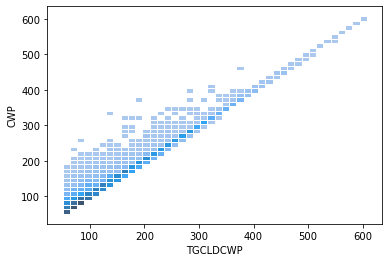

In [153]:
v_x = 'TGCLDCWP'
#ax = axs[1]
df_mod = dic_df[model_name_noresm]

_df = (df_mod[df_mod[v_x].notnull()])#[(df_mod['OA_category'].notna())])
_df = _df[_df[v_x]>50]
_df = _df[_df[v_x]<10000]
sns.histplot(
    x=v_x,
    y= 'CWP',
    data=_df,
    #hue=v_hue,
    #hue_order=hue_order,
    #ax = ax,
    legend=False,
    palette = 'Set1',
    edgecolor='w',
)

## ECHAM

In [154]:
df_mod = dic_df[model_name_noresm]

In [155]:
#mask_cl_waterpath = df_mod['cwp']>50

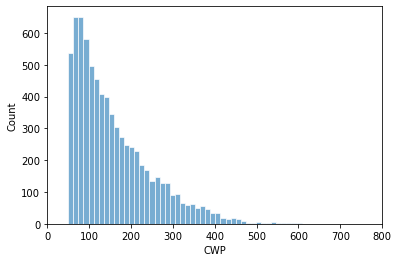

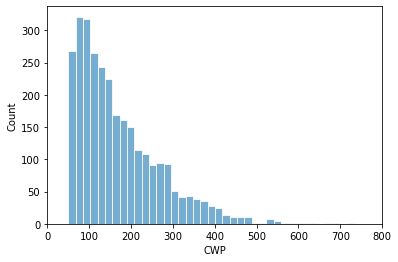

(0.0, 1000.0)

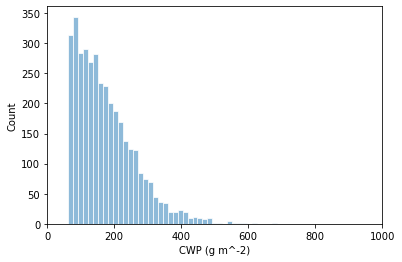

In [156]:
#(1000*df_mod['cwp']).plot.hist()
v_x = 'CWP'
#ax = axs[1]
df_mod = dic_df[model_name_noresm]

_df = (df_mod[df_mod[v_x].notnull()])#[(df_mod['OA_category'].notna())])
_df = _df[_df[v_x]>50]
_df = _df[_df[v_x]<10000]
sns.histplot(
    x=v_x,
    data=_df,
    #hue=v_hue,
    #hue_order=hue_order,
    #ax = ax,
    legend=False,
    palette = 'Set1',
    alpha=.6,
    edgecolor='w',
)
plt.xlim([0,800])
plt.show()
v_x = 'CWP'
#ax = axs[1]
df_mod = dic_df[model_name_echam]

_df = (df_mod)#[(df_mod['OA_category'].notna())])
#_df = _df[_df[v_x]>50]
sns.histplot(
    x=v_x,
    data=_df,
    #hue=v_hue,
    #hue_order=hue_order,
    #ax = ax,
    legend=False,
    palette = 'Set1',
    alpha=.6,
    edgecolor='w',
)
plt.xlim([0,800])
plt.show()

v_x = 'CWP (g m^-2)'
_df = (dic_df['Observations'])#[(df_mod['OA_category'].notna())])
_df = _df[_df[v_x]>50]
sns.histplot(
    x=v_x,
    data=_df,
    #hue=v_hue,
    palette = 'hls',
    alpha=.5,
    #hue_order=hue_order,
    #ax = ax,
    legend=False,
    #palette = _palette,
    edgecolor='w',
)
plt.xlim([0,1000])

In [157]:
dic_df.keys()

dict_keys(['ECHAM-SALSA', 'NorESM', 'Observations'])

### Remove grid vells with no cloud top liquid

More than 10% cloud top liquid fraction in grid cell and 90% of the cloud fraction is covered by liquid. 

## Rename 


In [158]:
rn_dic_echam = {
    #'cwp'      : 'CWP',
   # 'cwp_incld'      : 'CWP',
   # 'cod'      : 'COT',
    #'ceff_ct'  : 'r_eff',
   # 'ceff_ct_incld'  : 'r_eff',
    
    
}
rn_dic_noresm = {
    'TGCLDCWP_incld'         : 'CWP',
    'TOT_CLD_VISTAU_s_incld': 'COT',
    'ACTREL_incld'     : 'r_eff',
}
rn_dic_obs = {
    'CWP (g m^-2)'        : 'CWP',
    'CER (micrometer)'    : 'r_eff',
    'OA (microgram m^-3)' : 'OA',
    
}



In [159]:
dic_df['ECHAM-SALSA']['CWP']

time        lat        lon   
2012-01-01  64.350730  22.500   NaN
                       24.375   NaN
                       26.250   NaN
                       28.125   NaN
                       30.000   NaN
                                 ..
2018-12-31  60.620396  22.500   NaN
                       24.375   NaN
                       26.250   NaN
                       28.125   NaN
                       30.000   NaN
Name: CWP, Length: 38355, dtype: float64

In [160]:
for key, rn in zip([model_name_noresm, model_name_echam,'Observations'], [rn_dic_noresm, rn_dic_echam, rn_dic_obs]):
    dic_df[key] = dic_df[key].rename(rn, axis=1)

## Group by cloud water path

In [161]:
pd.to_datetime(df_mod.reset_index()['time']).dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [162]:
dic_bins = dict()
dic_bins[model_name_noresm] = pd.IntervalIndex.from_breaks([   50,  80,  110, 140, 170, 200,230, 500])
dic_bins[model_name_echam] = pd.IntervalIndex.from_breaks([   50,  80,  110, 140, 170, 200,230, 500])

In [163]:
df_mod = dic_df[model_name_noresm]

v = 'CLDFREE'
df_mod[v].quantile(.99)

0.3451893916000004

In [164]:
df_mod[v].mean()

0.01425345813119186

In [165]:
df_mod[v].max()

0.64732695

In [166]:
df_mod[v].min()

0.0

for key in dic_df.keys():
    df_mod = dic_df[key]
    df_mod['CWP_qcut']=pd.qcut(df_mod['CWP'],6)# bins=bins, labels=labels)§
    df_mod['CWP_qcutl'] = df_mod['CWP_qcut'].apply(lambda x:x.mid)
    dic_df[key] = df_mod
    

    df_mod = dic_df[model_name]
    bins = dic_bins[model_name]
    df_mod['CWP_cut']=pd.cut(df_mod['CWP'], bins=bins)#, labels=labels)


    df_mod['CWP_cutl'] = df_mod['CWP_cut'].apply(lambda x:x.mid)


    df_mod['OA_low'] = df_mod['OA']<df_mod['OA'].quantile(.34)


In [167]:
for model_name in models:
    print(model_name)
    df_mod = dic_df[model_name]
    # Optical thickness > 50:
    df_mod = df_mod[df_mod['CWP']>=50]

    bins = dic_bins[model_name]
    df_mod['CWP_cut']=pd.cut(df_mod['CWP'], bins=bins)#, labels=labels)

    
    df_mod['CWP_cutl'] = df_mod['CWP_cut'].apply(lambda x:x.mid)
    di = dict(df_mod.groupby('CWP_cut').median()['CWP'])
    for k in di.keys():
        di[k] = int(np.round(di[k]))
    df_mod['CWP_cutlm'] = df_mod['CWP_cut'].apply(lambda x:di[x])
    
    n_bins = 7
    labels = np.arange(n_bins)

    qants = df_mod['CWP'].quantile([.05,.95])

    bins2 = pd.interval_range(qants.iloc[0], qants.iloc[1], periods=n_bins)
    df_mod['CWP_cut2']=pd.cut(df_mod['CWP'], bins=bins2, labels=labels)
    di_per_lab = {bins2[i]:labels[i] for i in range(len(labels))}

    df_mod['CWP_cut2l'] = df_mod['CWP_cut2'].apply(lambda x:di_per_lab[x])
    di = dict(df_mod.groupby('CWP_cut2').median()['CWP'])
    for k in di.keys():
        di[k] = int(np.round(di[k]))
    df_mod['CWP_cut2lm'] = df_mod['CWP_cut2'].apply(lambda x:di[x])
    
    
    
    df_mod['OA_low'] = df_mod['OA']<df_mod['OA'].quantile(.34)
    df_mod['OA_high']= df_mod['OA']>df_mod['OA'].quantile(.66)
    mid_range = ( df_mod['OA'].quantile(.34)<df_mod['OA']) & (df_mod['OA']<df_mod['OA'].quantile(.66))
    df_mod['OA_mid_range'] = mid_range
    df_mod=df_mod.assign(OA_category= pd.NA)
    df_mod.loc[df_mod['OA_high'], 'OA_category'] = 'OA high'
    df_mod.loc[df_mod['OA_low'], 'OA_category'] = 'OA low'
    
    
    
    
    for v in high_low_vars:
        if v not in df_mod.columns:
            continue 
        df_mod[f'{v}_low'] = df_mod[v]<df_mod[v].quantile(.34)
        df_mod[f'{v}_high']= df_mod[v]>df_mod[v].quantile(.66)
        df_mod[f'{v}_category'] = pd.NA#df_hyy_1.assign(OA_category= pd.NA)
    
        df_mod.loc[df_mod[f'{v}_high'], f'{v}_category'] = f'{v} high'
        df_mod.loc[df_mod[f'{v}_low'], f'{v}_category'] = f'{v} low'
    
    
    dic_df[model_name] = df_mod
    
    
    
    
for model_name in [model_name_noresm]:
    df_mod = dic_df[model_name]
    v = 'CLDFREE'
    df_mod[f'{v}_low'] = df_mod[v]<df_mod[v].quantile(.34)
    df_mod[f'{v}_high']= df_mod[v]>df_mod[v].quantile(.66)
    mid_range = ( df_mod[v].quantile(.34)<df_mod[v]) & (df_mod[v]<df_mod[v].quantile(.66))
    df_mod[f'{v}_mid_range'] = mid_range
    df_mod=df_mod.assign(**{f'{v}_category': pd.NA})
    df_mod.loc[df_mod[f'{v}_high'], f'{v}_category'] = f'{v} high'
    df_mod.loc[df_mod[f'{v}_low'], f'{v}_category'] = f'{v} low'
    dic_df[model_name] = df_mod

NorESM
ECHAM-SALSA


/tmp/ipykernel_80998/970158435.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['CWP_cut']=pd.cut(df_mod['CWP'], bins=bins)#, labels=labels)
/tmp/ipykernel_80998/970158435.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['CWP_cutl'] = df_mod['CWP_cut'].apply(lambda x:x.mid)
/tmp/ipykernel_80998/970158435.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [168]:
for key in dic_df.keys():
    df_mod = dic_df[key]
    df_mod['CWP_qcut']=pd.qcut(df_mod['CWP'],6)# bins=bins, labels=labels)§
    df_mod['CWP_qcutl'] = df_mod['CWP_qcut'].apply(lambda x:x.mid)
    dic_df[key] = df_mod

## Category of OA concentration

## Distribution plots:

In [169]:
palette = 'Set2'

In [170]:
import numpy as np

In [171]:
import matplotlib.cm as cm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [172]:
#cmap = cm.get_cmap(name=palette, )
cmap_list = ['#441FE0','#BBE01F'][::-1]#cmap(a) for a in np.linspace(0,1,8)]

In [173]:
palette_OA = cmap_list[0:2]

3673
Plots/dist_plot/cloud_props_long_sum_distribution_mod_obs_COT_count.png


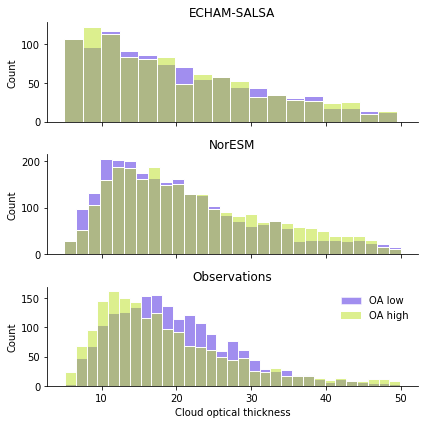

In [174]:
fig, axs = plt.subplots(3,1, sharex=True, figsize =[6,6])
v_x = 'COT'
x_cut = 100

v_hue = 'OA_category'
hue_order=['OA low', 'OA high'][::-1]

_palette = palette_OA#cmap_list[0:2]


for key, ax in zip(dic_df.keys(), axs):
    _df = dic_df[key].copy()
    _df = _df[_df[v_x]<x_cut]

    sns.histplot(
        x=v_x,
        data=_df,
        hue=v_hue,
        hue_order=hue_order,
        palette=_palette,
        legend=False,
        edgecolor='w',
        ax = ax
    )
#plt.ylim([0,250])
    ax.set_title(key)#'Observations')



custom_lines = [Line2D([0], [0], color=cmap_list[0], lw=4),
                Line2D([0], [0], color=cmap_list[1], lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)

               ]

leg_els = [

    Patch(edgecolor='w',alpha = .5, facecolor=_palette[1], label='OA low'),
    Patch(edgecolor=None, alpha = .5,facecolor=_palette[0], label='OA high'),

]

ax.legend(handles = leg_els, frameon=False)
ax.set_xlabel('Cloud optical thickness')
#plt.ylim([0,250])
print(len(_df))
sns.despine(fig)

fn = make_fn('mod_obs', v_x,'count',comment='distribution', distplot=True)
print(fn)

#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



3659
Plots/dist_plot/cloud_props_long_sum_distribution_mod_obs_CWP_count.png


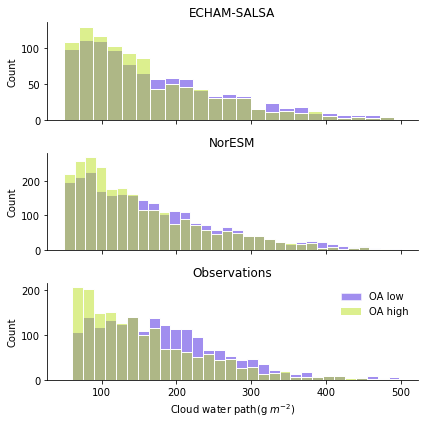

In [175]:
fig, axs = plt.subplots(3,1, sharex=True, figsize =[6,6])

v_x = 'CWP'
x_cut = 500
v_hue = 'OA_category'
hue_order=['OA low', 'OA high'][::-1]

_palette = palette_OA#cmap_list[0:2]


for key, ax in zip(dic_df.keys(), axs):
    _df = dic_df[key].copy()
    _df = _df[_df[v_x]<x_cut]

    sns.histplot(
        x=v_x,
        data=_df,
        hue=v_hue,
        hue_order=hue_order,
        palette=_palette,
        legend=False,
        edgecolor='w',
        ax = ax
    )
#plt.ylim([0,250])
    ax.set_title(key)#'Observations')



custom_lines = [Line2D([0], [0], color=cmap_list[0], lw=4),
                Line2D([0], [0], color=cmap_list[1], lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)

               ]

leg_els = [

    Patch(edgecolor='w',alpha = .5, facecolor=_palette[1], label='OA low'),
    Patch(edgecolor=None, alpha = .5,facecolor=_palette[0], label='OA high'),

]

ax.legend(handles = leg_els, frameon=False)
ax.set_xlabel('Cloud water path(g $m^{-2}$)')

#plt.ylim([0,250])
print(len(_df))
sns.despine(fig)

fn = make_fn('echam_noresm', v_x,'obs',comment='distribution')

#fig.savefig(fn, dpi=150)
fig.tight_layout()
fn = make_fn('mod_obs', v_x,'count',comment='distribution', distplot=True)
print(fn)

#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



In [176]:
s = dic_df[model_name_echam]['r_eff']#*dic_df[model_name_echam]['cl_time']
s = s[0<s]
len(s[s.notna()])

2949

2949
7412
3673
Plots/dist_plot/cloud_props_long_sum_distribution_mod_obs_r_eff_count.png


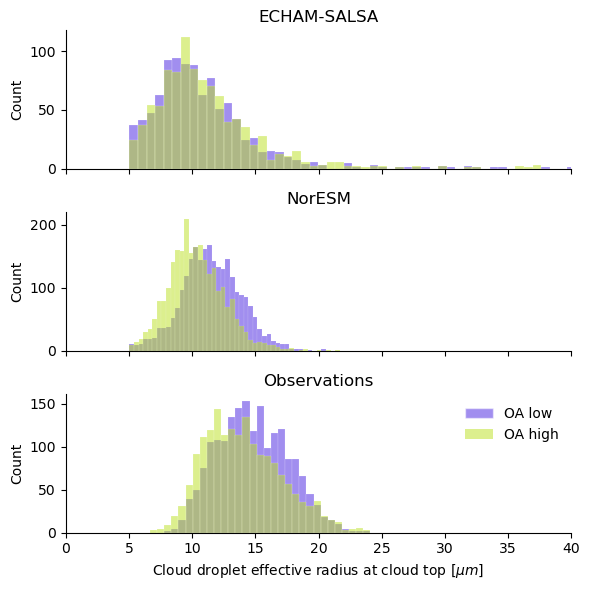

In [177]:
fig, axs = plt.subplots(3,1, sharex=True, figsize =[6,6], dpi=100)

v_x = 'r_eff'
x_cut = 700
v_hue = 'OA_category'
hue_order=['OA low', 'OA high'][::-1]

_palette = palette_OA#cmap_list[0:2]


for key, ax in zip(dic_df.keys(), axs):
    _df = dic_df[key].copy()
    _df = _df[_df[v_x]<x_cut]
    _df = _df[_df[v_x]>0]

    sns.histplot(
        x=v_x,
        data=_df,
        hue=v_hue,
        hue_order=hue_order,
        palette=_palette,
        legend=False,
        edgecolor='w',
        ax = ax
    )
    #plt.ylim([0,250])
    ax.set_title(key)#'Observations')
    print(len(_df))
    


custom_lines = [Line2D([0], [0], color=cmap_list[0], lw=4),
                Line2D([0], [0], color=cmap_list[1], lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)

               ]

leg_els = [

    Patch(edgecolor='w',alpha = .5, facecolor=_palette[1], label='OA low'),
    Patch(edgecolor=None, alpha = .5,facecolor=_palette[0], label='OA high'),

]

ax.legend(handles = leg_els, frameon=False)
ax.set_xlabel('Cloud droplet effective radius at cloud top [$\mu m$]')

#plt.ylim([0,250])
sns.despine(fig)

for ax in axs: 
    ax.set_xlim([0,40])
fn = make_fn('echam_noresm', v_x,'obs',comment='distribution')

#fig.savefig(fn, dpi=150)
fig.tight_layout()
fn = make_fn('mod_obs', v_x,'count',comment='distribution', distplot=True)
print(fn)
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)



### Fractional occurance of cloud top liquid

## Cloud optical thickness

### Incloud

In [178]:
hue_order = ['OA low','OA high']#[::-1]
palette_OA_2 = palette_OA[::-1]

In [179]:
order_keys = [model_name_noresm, model_name_echam, 'Observations']

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/

Plots/rel_plot/cloud_props_long_sum_boxen_swarm_N100_category_COT_CWP_cut2l.png


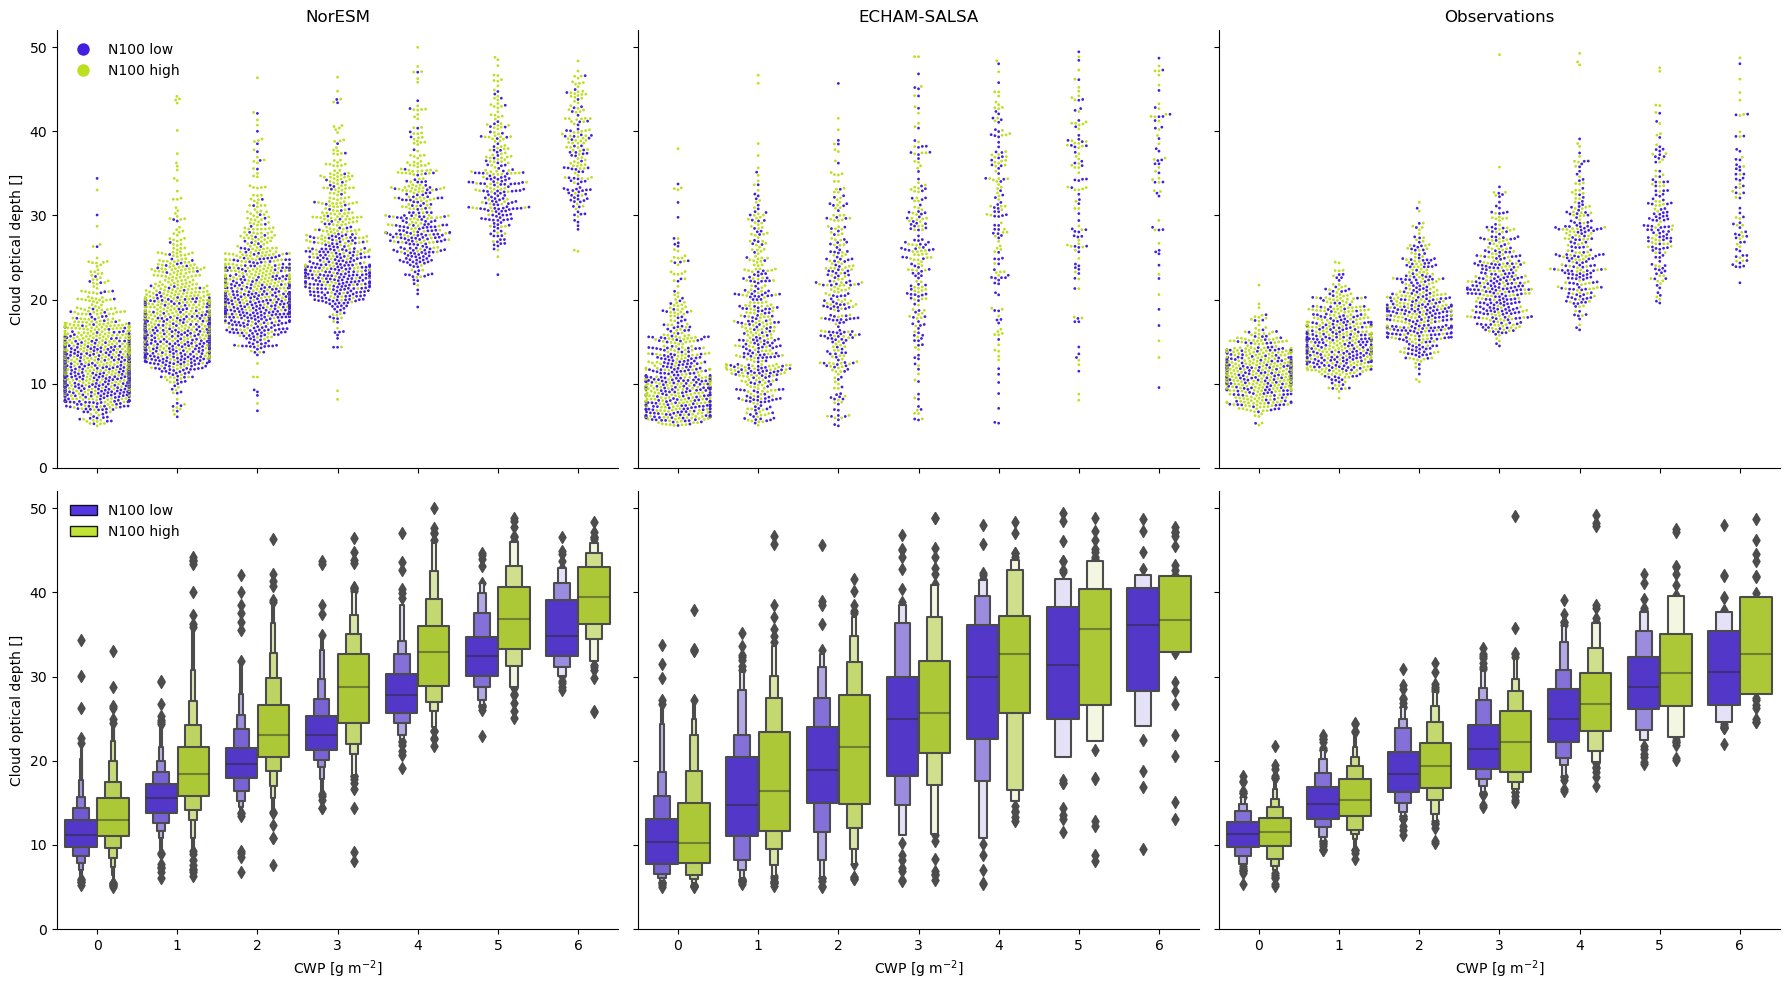

In [180]:
x_var = 'CWP_cut2l'
y_var = 'COT'
hue_var = 'N100_category'
hue_labs = ['N100 low', 'N100 high']

v_hue = 'N100_category'
category = 'N100_category'


hue_order=['N100 low', 'N100 high']#[::-1]

ylim = [0,52]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

#for key,ax in zip(dic_df.keys(), axs[1,:]):
for key,ax in zip(order_keys, axs[1,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)


fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Plots/rel_plot/cloud_props_long_sum_boxen_swarm_N200_category_COT_CWP_cut2l.png


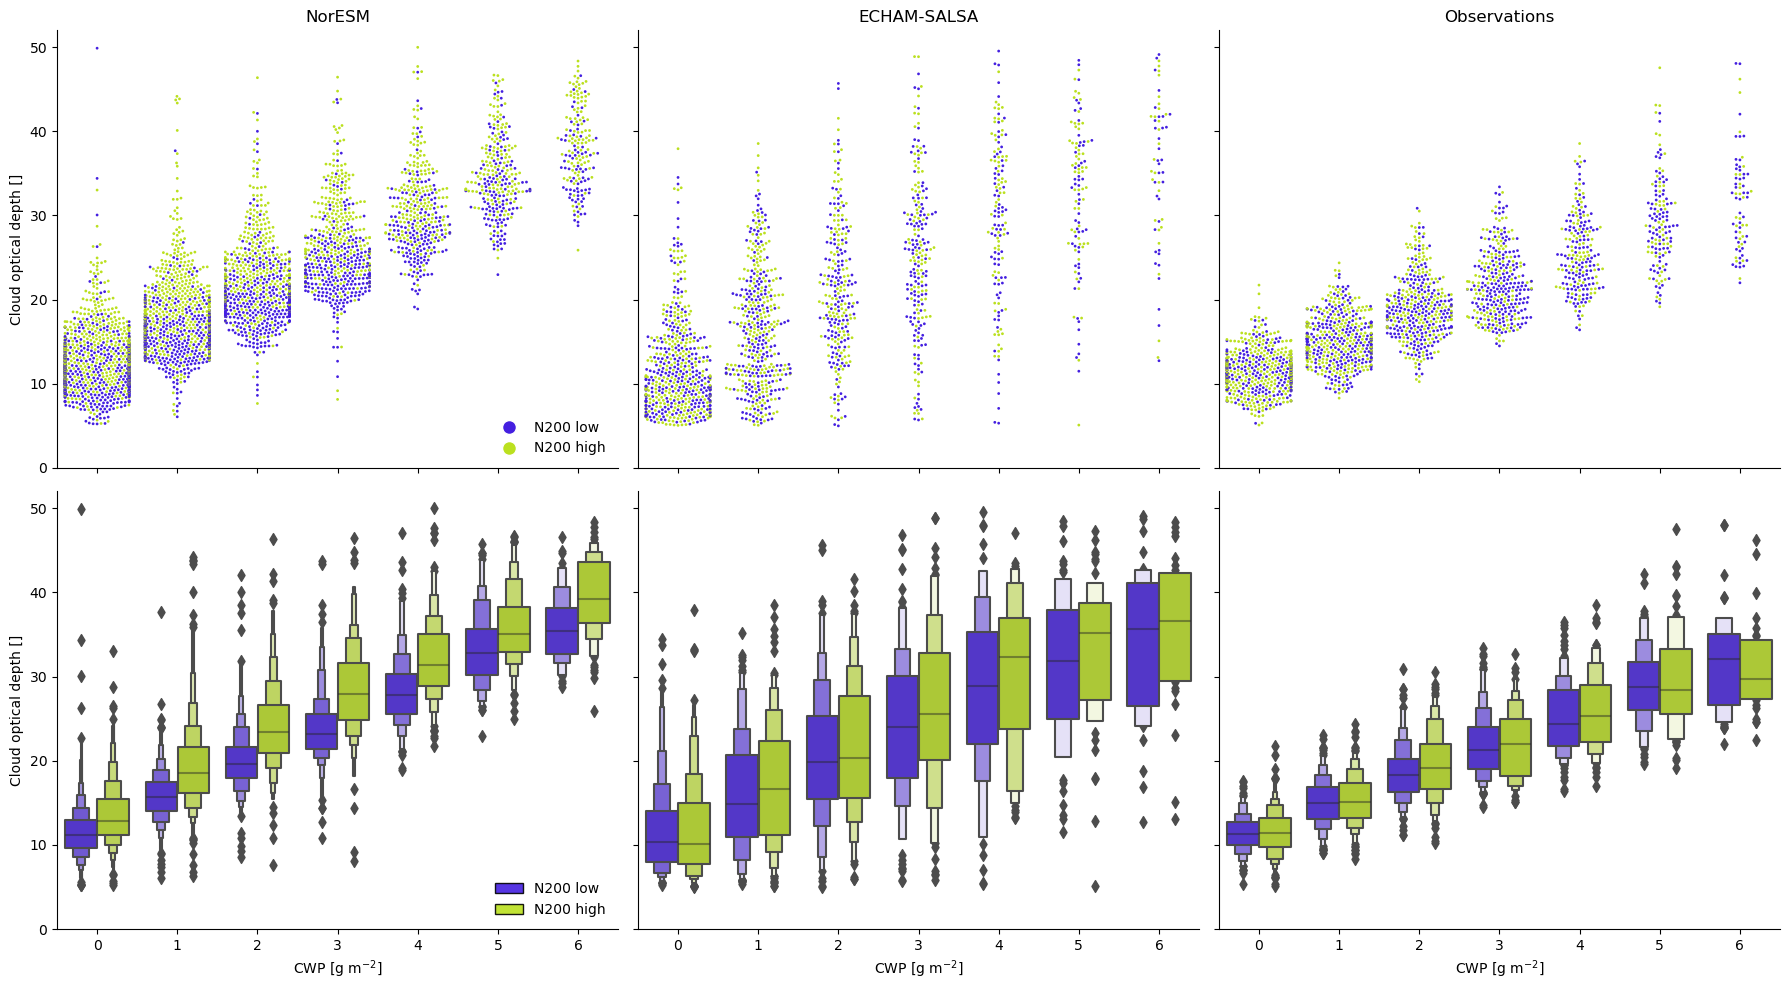

In [181]:
x_var = 'CWP_cut2l'
y_var = 'COT'
hue_var = 'N200_category'
hue_labs = ['N200 low', 'N200 high']

v_hue = 'N200_category'
category = 'N200_category'


hue_order=['N200 low', 'N200 high']#[::-1]

ylim = [0,52]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

#for key,ax in zip(dic_df.keys(), axs[1,:]):
for key,ax in zip(order_keys, axs[1,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)


fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 54.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 35.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/

Plots/rel_plot/cloud_props_long_sum_boxen_swarm_N50_category_COT_CWP_cut2l.png


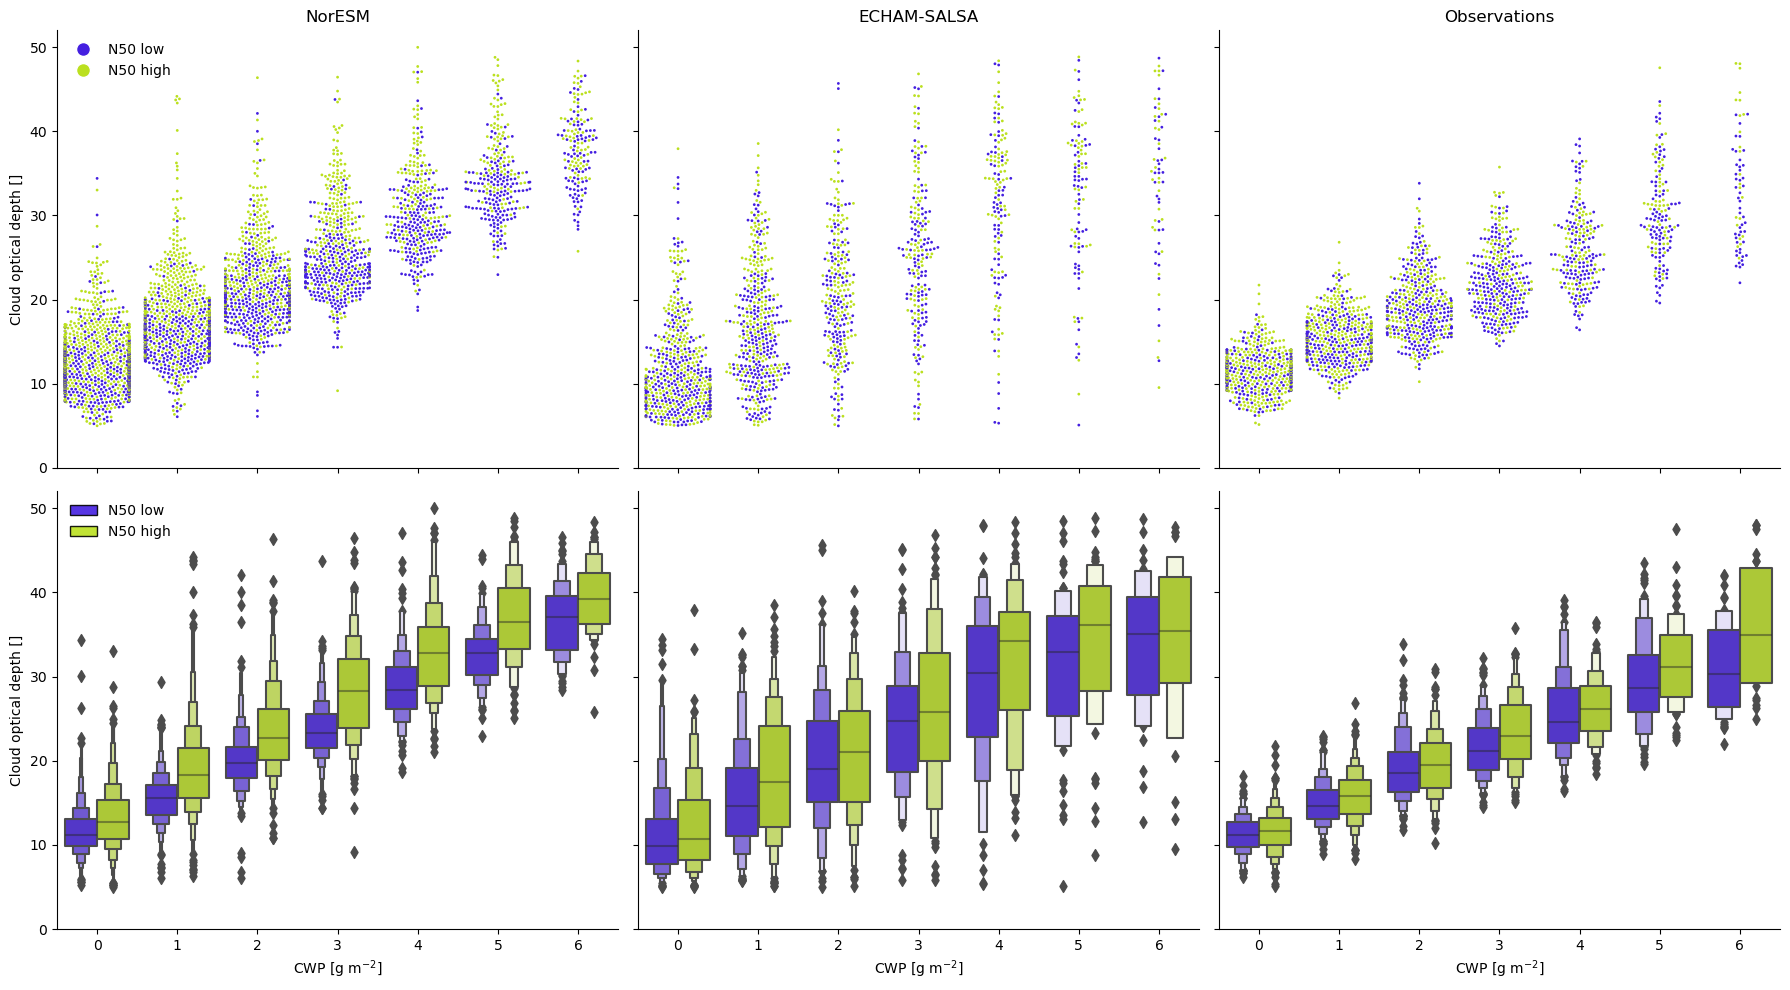

In [182]:
x_var = 'CWP_cut2l'
y_var = 'COT'
hue_var = 'N50_category'
hue_labs = ['N50 low', 'N50 high']

v_hue = 'N50_category'
category = 'N50_category'


hue_order=['N50 low', 'N50 high']#[::-1]

ylim = [0,52]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

#for key,ax in zip(dic_df.keys(), axs[1,:]):
for key,ax in zip(order_keys, axs[1,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)


fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

Plots/rel_plot/cloud_props_long_sum_boxen_swarm_OA_category_COT_CWP_cutlm.png


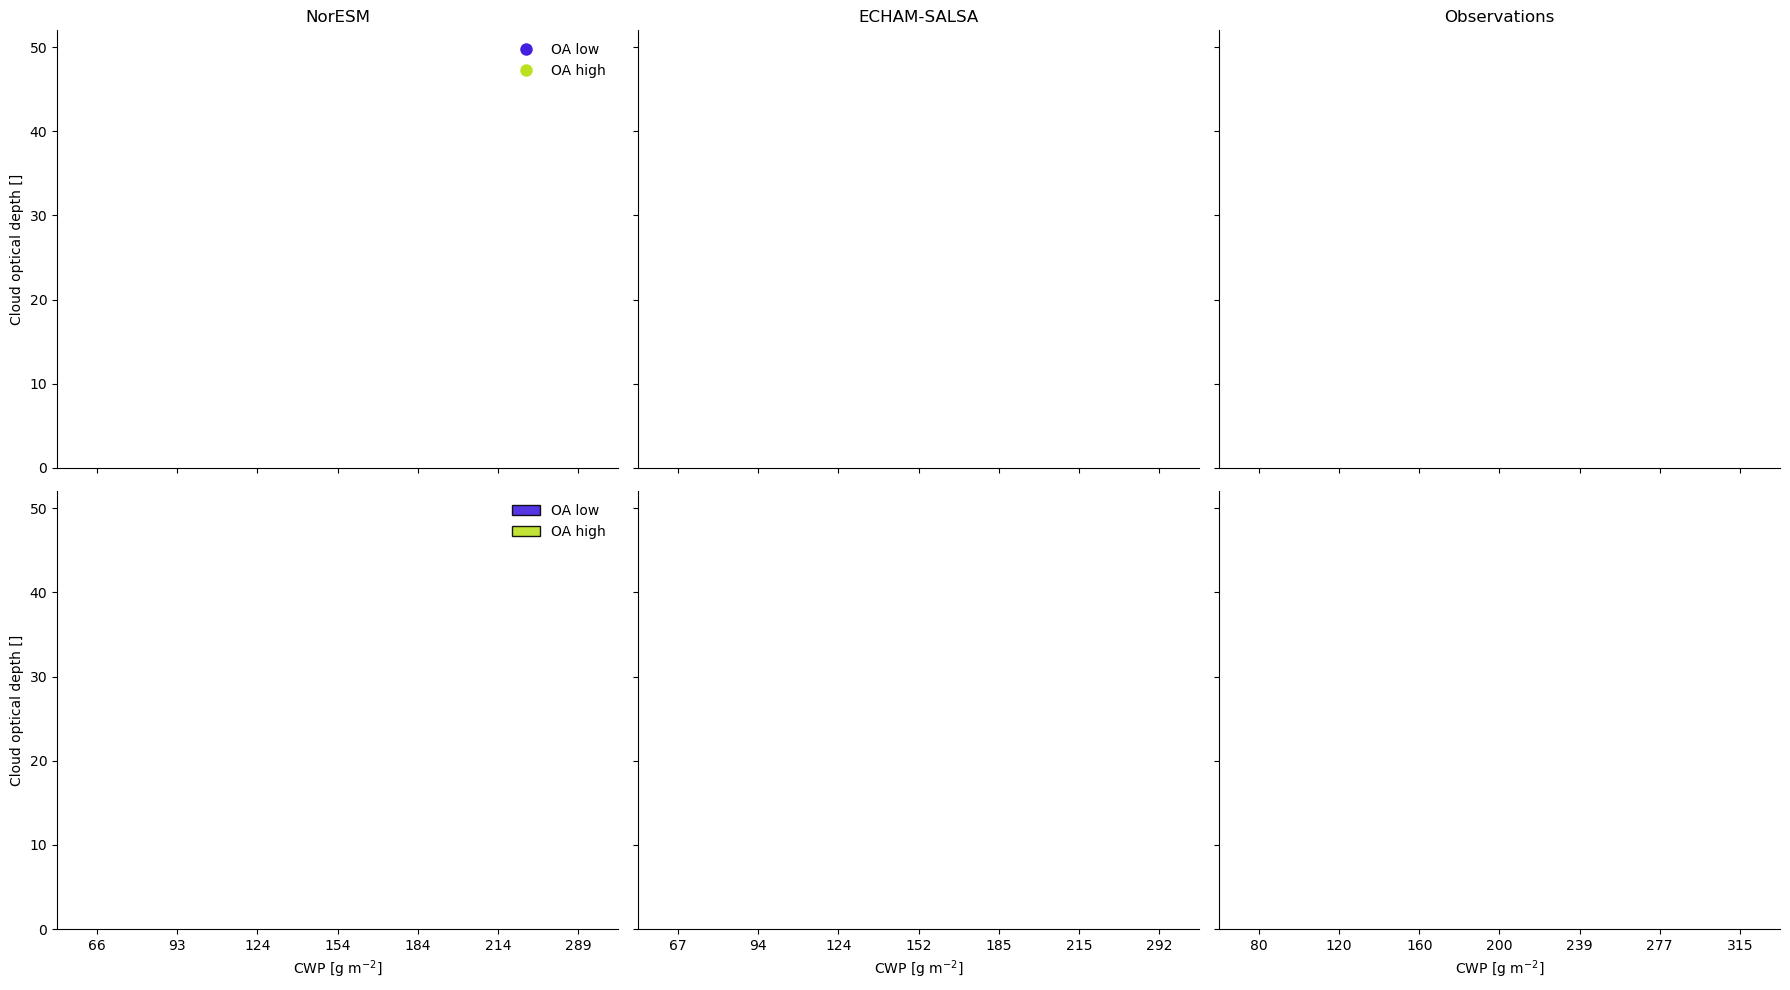

In [183]:
x_var = 'CWP_cutlm'
y_var = 'COT'
hue_var = 'OA_category'
hue_labs = ['OA low', 'OA high']
ylim = [0,52]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

#for key,ax in zip(dic_df.keys(), axs[1,:]):
for key,ax in zip(order_keys, axs[1,:]):
    
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('Cloud optical depth []')
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)


fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

Plots/rel_plot/cloud_props_long_sum_boxen_swarm_OA_category_r_eff_CWP_cutlm.png


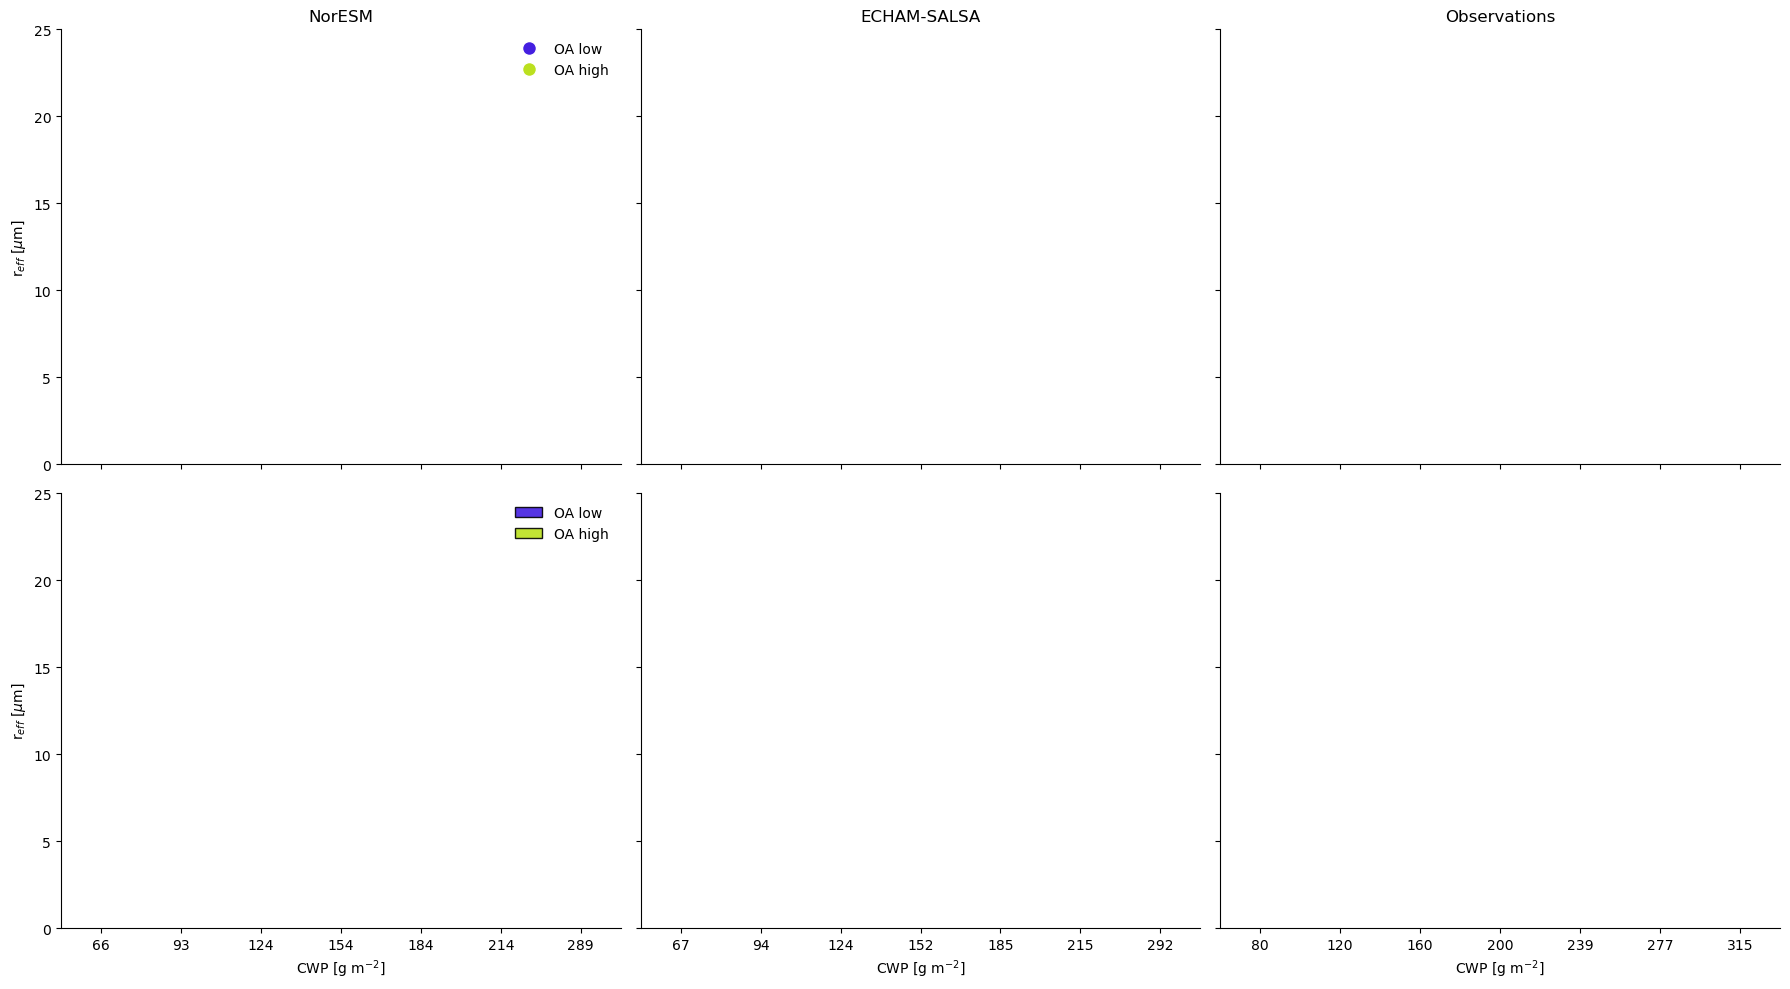

In [184]:
x_var = 'CWP_cutlm'
y_var = 'r_eff'
hue_var = 'OA_category'
hue_labs = ['OA low', 'OA high']
ylim = [0,25]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
#for key,ax in zip(dic_df.keys(), axs[0,:]):

    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

for key,ax in zip(order_keys, axs[1,:]):
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('r$_{eff}$ [$\mu$m]')
    
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)

sns.despine(fig)
fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)
plt.show()

### Grid box avg

Plots/rel_plot/cloud_props_long_sum_boxen_swarm_OA_category_r_eff_CWP_cut2l.png


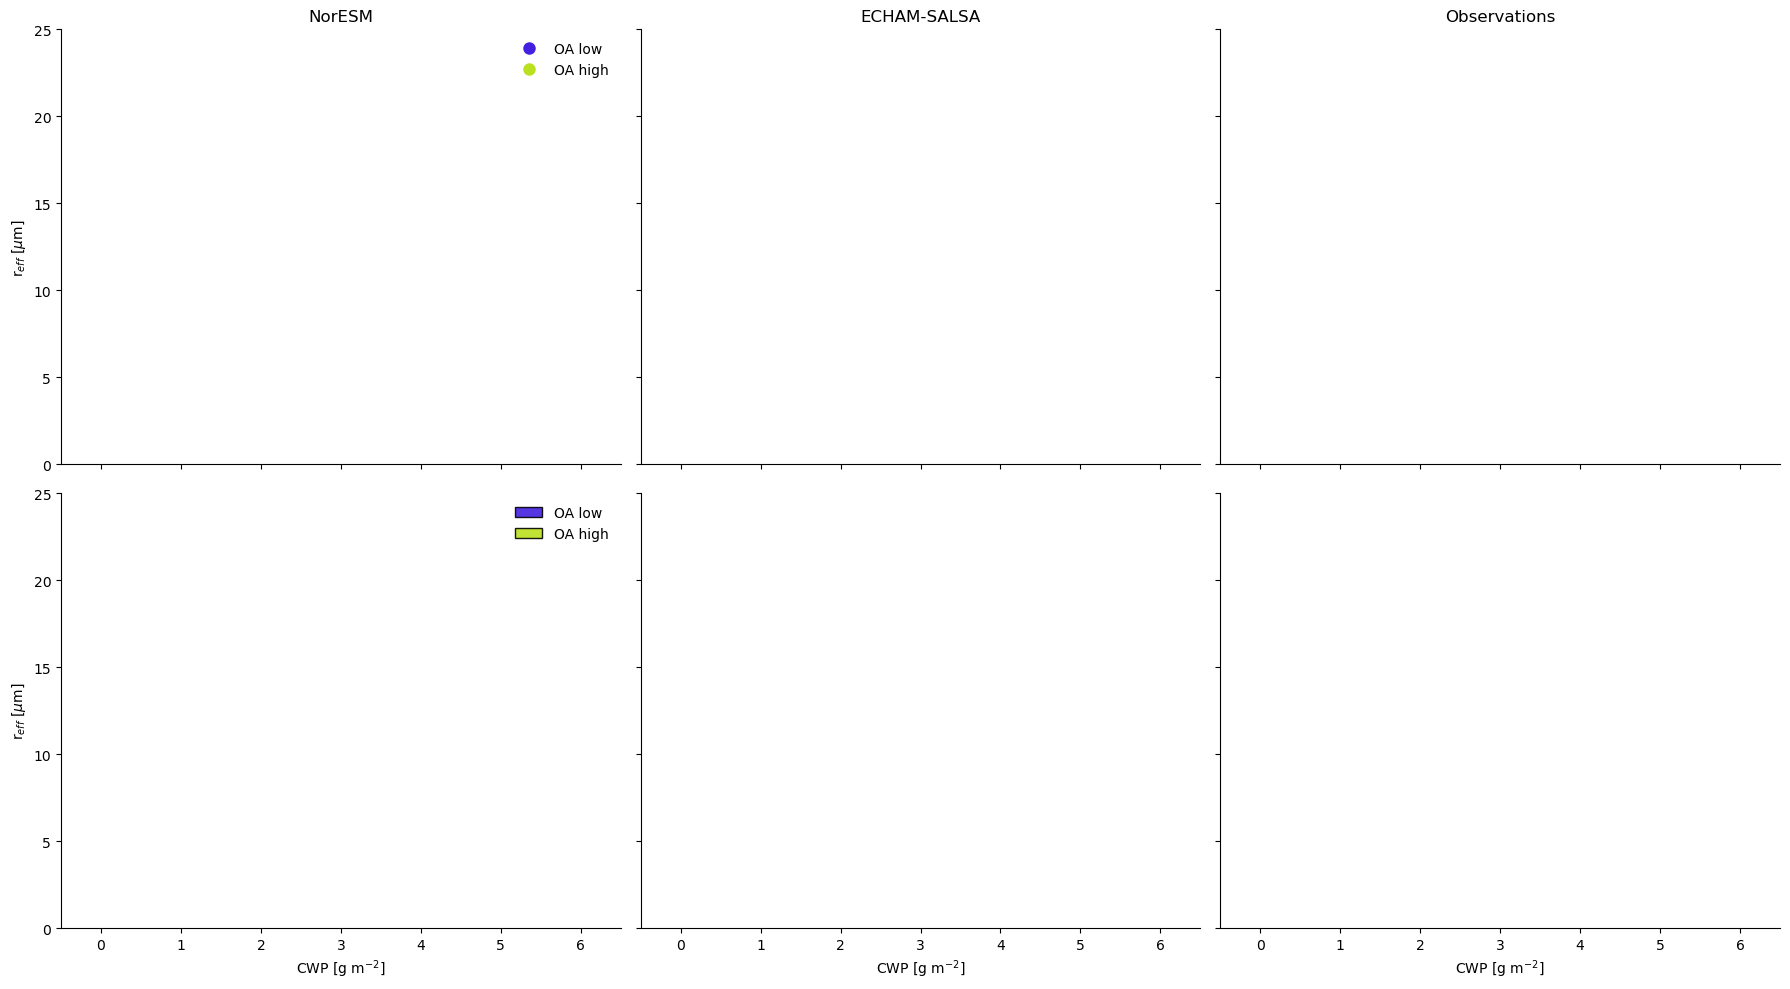

In [185]:
x_var = 'CWP_cut2l'
y_var = 'r_eff'
hue_var = 'OA_category'
hue_labs = ['OA low', 'OA high']
ylim = [0,25]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
#for key,ax in zip(dic_df.keys(), axs[0,:]):

    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

for key,ax in zip(order_keys, axs[1,:]):
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('r$_{eff}$ [$\mu$m]')
    
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)
fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

Plots/rel_plot/cloud_props_long_sum_boxen_swarm_OA_category_r_eff_CWP_cut2lm.png


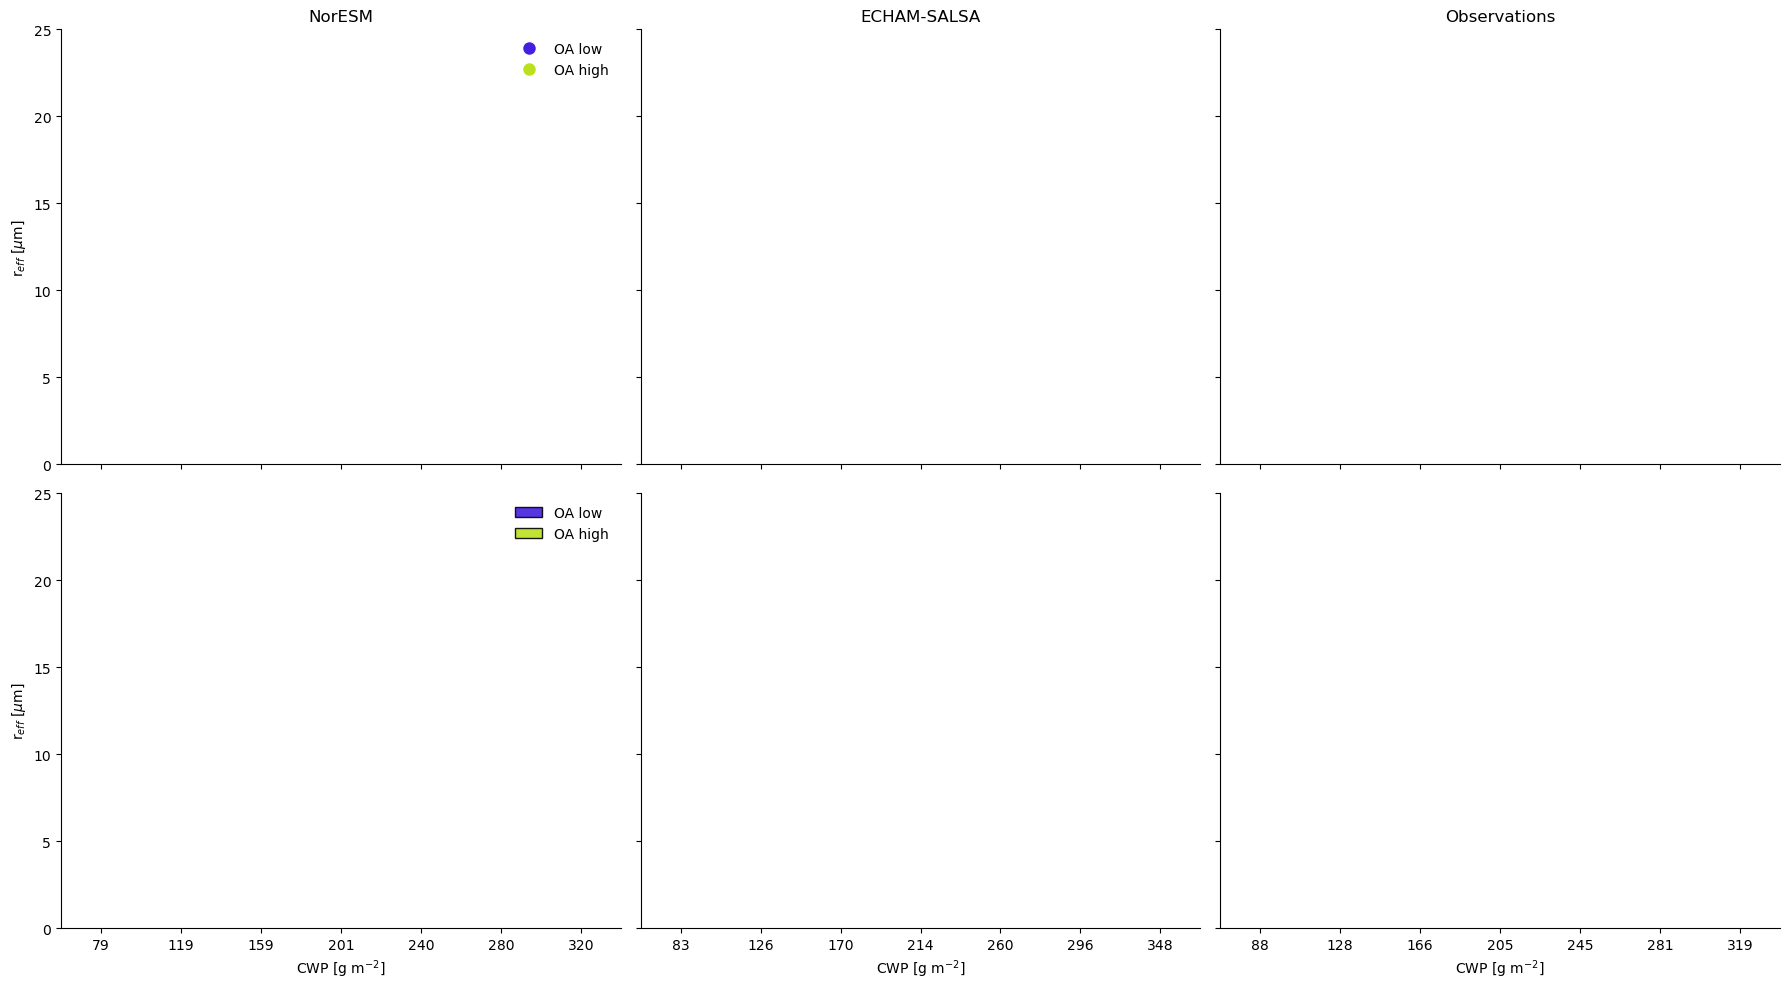

In [186]:
x_var = 'CWP_cut2lm'
y_var = 'r_eff'
hue_var = 'OA_category'
hue_labs = ['OA low', 'OA high']
ylim = [0,25]
figsize = [18,10]
_palette = palette_OA_2

#fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)
fig, axs = plt.subplots(2,3,figsize=figsize, sharey=True, sharex='col', dpi=100)

markersize= 2


for key,ax in zip(order_keys, axs[0,:]):
#for key,ax in zip(dic_df.keys(), axs[0,:]):

    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]

    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]
    
    sns.swarmplot(
        x=x_var,
        y=y_var,
        data=_df_lim,
        hue_order=hue_order,
        hue=hue_var,
        palette=_palette,
        size = markersize,
        ax = ax,
    )
    ax.set_title(key)

for key,ax in zip(order_keys, axs[1,:]):
    _df = dic_df[key].copy()
    
    _df_lim =_df[(_df[y_var]<=ylim[1])& (_df[y_var]>=ylim[0])]
    _df_lim = _df_lim[_df_lim[x_var].notna()]
    _df_lim = _df_lim[_df_lim[y_var].notna()]
    _df_lim = _df_lim[_df_lim[hue_var].notna()]

    sns.boxenplot(
        x=x_var,
        y=y_var,
        data= _df_lim,
        hue_order=hue_order,#['OA low','OA high'],
        hue=hue_var,
        #kind='boxen',
        ax = ax,
        palette=_palette,
           )


    

    ## ADJUSTMENTS

for ax in axs.flatten():
    ax.legend([],[], frameon=False)
    ax.set_ylabel(None)


leg_els = [
    Patch(edgecolor='k', alpha = .9,facecolor=_palette[0], label=hue_labs[0]),
    Patch(edgecolor='k',alpha = .9, facecolor=_palette[1], label=hue_labs[1]),
          ]
axs[1,0].legend(handles = leg_els, frameon=False)

leg_els = [
     Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[0], markersize=10,
            label=hue_labs[0]
           ),
         Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=_palette[1], markersize=10,
            label=hue_labs[1]
           ),
          ]
axs[0,0].legend(handles = leg_els, frameon=False)

for ax in axs[:,0]:
    ax.set_ylabel('r$_{eff}$ [$\mu$m]')
    
for ax in axs[1,:]:
    ax.set_xlabel('CWP [g m$^{-2}$]')
for ax in axs[0,:]:
    ax.set_xlabel(None)

for ax in axs.flatten():

    ax.set_ylim(ylim)



sns.despine(fig)
fn = make_fn(hue_var, y_var,x_var,comment='boxen_swarm', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)

plt.show()

### Grid box avg

In [187]:
_df = dic_df[key]

In [188]:
_df.groupby('CWP_cut').count()['OA']

CWP_cut
(60, 100]     852
(100, 140]    753
(140, 180]    640
(180, 220]    511
(220, 260]    359
(260, 300]    235
(300, 340]    137
Name: OA, dtype: int64

In [189]:
from bs_fdbck.util.plot.BSOA_plots import cdic_model

## Difference plot

NameError: name 'alpha_err' is not defined

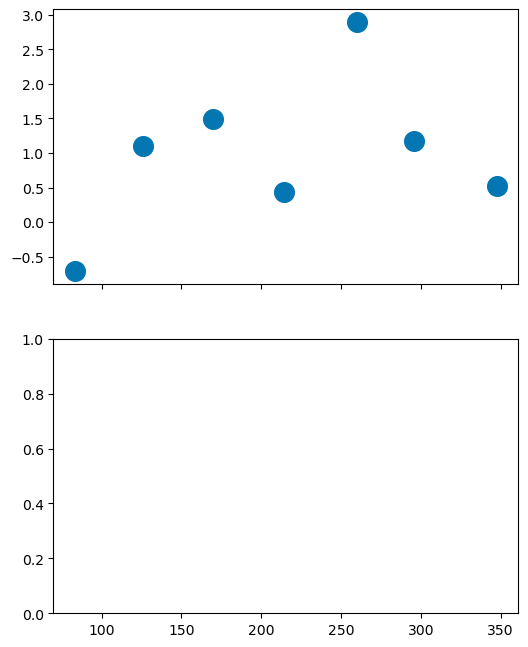

In [190]:
figsize = [6,8]
_palette = palette_OA_2
ylim = None#[0,25]
hue_labs = ['OA low', 'OA high']
hue_var = 'OA_category'

ylim2 = [-4,4]
# fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)

markersize= 2


fig, axs = plt.subplots(2,1,figsize=figsize, sharey='row', sharex='col', dpi=100)


x_var = 'CWP_cut2lm'
y_var1 = 'COT'
y_var2 = 'r_eff'

ylab1 = r'$\Delta $ Cloud optical depth []'
ylab2 = r'$\Delta r_e$ [$\mu$ m]'


ax = axs[0]
for ax, y_var in zip(axs,[y_var1, y_var2]):
    for key in dic_df.keys():
        _df = dic_df[key].copy()
    
        _df_lim =_df.copy() 
        notna = (_df_lim[x_var].notna() & _df_lim[y_var].notna())&(_df_lim[hue_var].notna())
        _df_lim = _df_lim[notna]
        #_df_lim = _df_lim[_df_lim[y_var].notna()]
        #_df_lim = _df_lim[_df_lim[hue_var].notna()]
    
        _df_low = _df_lim[_df_lim[hue_var] == hue_labs[0]]
        _df_high = _df_lim[_df_lim[hue_var] == hue_labs[1]]
    
        med_low = _df_low.groupby(x_var).median()
        med_high = _df_high.groupby(x_var).median()
        std_low = _df_low.groupby(x_var).std()
        std_high = _df_high.groupby(x_var).std()
        n_low = _df_low.groupby(x_var).count()
        n_high = _df_high.groupby(x_var).count()
    
        diff_med = med_high-med_low
        z_alph = 1.96
    
        pm_int = z_alph*np.sqrt((std_low**2/n_low + std_high**2/n_high))
    
        ax.scatter(diff_med.index, diff_med[y_var], c=cdic_model[key], label=key,s=200)
        ax.errorbar(diff_med.index, diff_med[y_var], yerr=pm_int[y_var], c=cdic_model[key], linewidth=0, elinewidth=8, alpha=alpha_err)

for ax in axs:
    ax.axhline(0, c='k')
    
axs[0].set_ylabel(ylab1)
axs[1].set_ylabel(ylab2)
axs[1].set_ylim(ylim2)

axs[1].set_xlabel('CWP [g m$^{-2}$]')

ax.legend(frameon=False)

axs[0].set_title('Difference between high OA and low OA')



sns.despine(fig)
fn = make_fn(hue_var, y_var1,x_var,comment=f'{y_var2}_diff_median', relplot=True)
print(fn) 

#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)
plt.show()

### Grid box avg

In [ ]:
figsize = [6,8]
_palette = palette_OA_2
ylim = None#[0,25]
hue_labs = ['OA low', 'OA high']
hue_var = 'OA_category'

# fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)

markersize= 2


fig, axs = plt.subplots(2,1,figsize=figsize, sharey='row', sharex='col', dpi=100)


x_var = 'CWP_cutlm'
y_var1 = 'COT'
y_var2 = 'r_eff'

ylab1 = r'$\Delta $ Cloud optical depth []'
ylab2 = r'$\Delta r_e$ [$\mu$ m]'


ax = axs[0]
for ax, y_var in zip(axs,[y_var1, y_var2]):
    for key in dic_df.keys():
        _df = dic_df[key].copy()
    
        _df_lim =_df.copy() 
        notna = (_df_lim[x_var].notna() & _df_lim[y_var].notna())&(_df_lim[hue_var].notna())
        _df_lim = _df_lim[notna]
        #_df_lim = _df_lim[_df_lim[y_var].notna()]
        #_df_lim = _df_lim[_df_lim[hue_var].notna()]
    
        _df_low = _df_lim[_df_lim[hue_var] == hue_labs[0]]
        _df_high = _df_lim[_df_lim[hue_var] == hue_labs[1]]
    
        med_low = _df_low.groupby(x_var).median()
        med_high = _df_high.groupby(x_var).median()
        std_low = _df_low.groupby(x_var).std()
        std_high = _df_high.groupby(x_var).std()
        n_low = _df_low.groupby(x_var).count()
        n_high = _df_high.groupby(x_var).count()
    
        diff_med = med_high-med_low
        z_alph = 1.96
    
        pm_int = z_alph*np.sqrt((std_low**2/n_low + std_high**2/n_high))
    
        ax.scatter(diff_med.index, diff_med[y_var], c=cdic_model[key], label=key,s=200)
        ax.errorbar(diff_med.index, diff_med[y_var], yerr=pm_int[y_var], c=cdic_model[key], linewidth=0, elinewidth=8, alpha=alpha_err)

for ax in axs:
    ax.axhline(0, c='k')
    
axs[0].set_ylabel(ylab1)
axs[1].set_ylabel(ylab2)

axs[1].set_xlabel('CWP [g m$^{-2}$]')

ax.legend(frameon=False)

axs[0].set_title('Difference between high OA and low OA')



sns.despine(fig)
fn = make_fn(hue_var, y_var1,x_var,comment=f'{y_var2}_diff_median', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)
plt.show()

### Grid box avg

In [ ]:
figsize = [6,8]
_palette = palette_OA_2
ylims =[None, [-3,3]]
hue_labs = ['OA low', 'OA high']
hue_var = 'OA_category'

# fig, axs = plt.subplots(2,2,figsize=figsize, sharey=True, sharex=True)

markersize= 2


fig, axs = plt.subplots(2,1,figsize=figsize, sharey='row', sharex='col', dpi=100)


x_var = 'CWP_cut2l'
y_var1 = 'COT'
y_var2 = 'r_eff'

ylab1 = r'$\Delta $ Cloud optical depth []'
ylab2 = r'$\Delta r_e$ [$\mu$ m]'


ax = axs[0]
for ax, y_var,ylim in zip(axs,[y_var1, y_var2], ylims):
    for key in dic_df.keys():
        _df = dic_df[key].copy()
    
        _df_lim =_df.copy() 
        notna = (_df_lim[x_var].notna() & _df_lim[y_var].notna())&(_df_lim[hue_var].notna())
        _df_lim = _df_lim[notna]
        #_df_lim = _df_lim[_df_lim[y_var].notna()]
        #_df_lim = _df_lim[_df_lim[hue_var].notna()]
    
        _df_low = _df_lim[_df_lim[hue_var] == hue_labs[0]]
        _df_high = _df_lim[_df_lim[hue_var] == hue_labs[1]]
    
        med_low = _df_low.groupby(x_var).median()
        med_high = _df_high.groupby(x_var).median()
        std_low = _df_low.groupby(x_var).std()
        std_high = _df_high.groupby(x_var).std()
        n_low = _df_low.groupby(x_var).count()
        n_high = _df_high.groupby(x_var).count()
    
        diff_med = med_high-med_low
        z_alph = 1.96
    
        pm_int = z_alph*np.sqrt((std_low**2/n_low + std_high**2/n_high))
    
        ax.scatter(diff_med.index, diff_med[y_var], c=cdic_model[key], label=key,s=200)
        ax.errorbar(diff_med.index, diff_med[y_var], yerr=pm_int[y_var], c=cdic_model[key], linewidth=0, elinewidth=8, alpha=alpha_err)
    ax.set_ylim(ylim)
for ax in axs:
    ax.axhline(0, c='k')
    
axs[0].set_ylabel(ylab1)
axs[1].set_ylabel(ylab2)

axs[1].set_xlabel('CWP bin [-]')

ax.legend(frameon=False)

axs[0].set_title('Difference between high OA and low OA')



sns.despine(fig)
fn = make_fn(hue_var, y_var1,x_var,comment=f'{y_var2}_diff_median', relplot=True)
print(fn) 
#fig.savefig(fn, dpi=150)
fig.tight_layout()
fig.savefig(fn, dpi=150)
fig.savefig(fn.with_suffix('.pdf'), dpi=150)
plt.show()

### Grid box avg

In [ ]:
plt.scatter(diff_med.index, diff_med[y_var], )
plt.errorbar(diff_med.index, diff_med[y_var], yerr=pm_int[y_var])

In [ ]:
pm_int

In [ ]:
sns.scatterplot(x = 'COT', y='CWP', data = _df)
plt.xlim([0,55])
plt.ylim([0,500])

In [ ]:
_dft = _df[ _df['CWP_cutl'] ==185]

In [ ]:
_dft.plot.scatter(x='COT', y='OA')